### Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings

In [2]:
path = 'C:\\Users\\Marce\\careerfoundry\\World Food fit'

In [3]:
data = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'emissions.csv'))

In [4]:
warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [5]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [6]:
pd.set_option('precision', 0)

In [7]:
data.head(5)

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Source Code,Source,Unit,Value,Flag,Flag Description,Note
0,GT,Emissions Totals,2,Afghanistan,7225,Emissions (CH4),1711,IPCC Agriculture,2000,2000,3050,FAO TIER 1,kilotonnes,308.486,Fc,Calculated data,NaN
1,GT,Emissions Totals,2,Afghanistan,7234,Direct emissions (N2O),1711,IPCC Agriculture,2000,2000,3050,FAO TIER 1,kilotonnes,7.726,Fc,Calculated data,NaN
2,GT,Emissions Totals,2,Afghanistan,7236,Indirect emissions (N2O),1711,IPCC Agriculture,2000,2000,3050,FAO TIER 1,kilotonnes,2.791,Fc,Calculated data,NaN
3,GT,Emissions Totals,2,Afghanistan,7230,Emissions (N2O),1711,IPCC Agriculture,2000,2000,3050,FAO TIER 1,kilotonnes,10.986,Fc,Calculated data,NaN
4,GT,Emissions Totals,2,Afghanistan,724413,Emissions (CO2eq) from CH4 (AR5),1711,IPCC Agriculture,2000,2000,3050,FAO TIER 1,kilotonnes,8637.597,Fc,Calculated data,NaN


In [8]:
data.shape

(184730, 17)

In [9]:
data.columns

Index(['Domain Code', 'Domain', 'Area Code (FAO)', 'Area', 'Element Code',
       'Element', 'Item Code', 'Item', 'Year Code', 'Year', 'Source Code',
       'Source', 'Unit', 'Value', 'Flag', 'Flag Description', 'Note'],
      dtype='object')

In [10]:
data.isnull().sum()

Domain Code              0
Domain                   0
Area Code (FAO)          0
Area                     0
Element Code             0
Element                  0
Item Code                0
Item                     0
Year Code                0
Year                     0
Source Code              0
Source                   0
Unit                     0
Value                    0
Flag                     0
Flag Description         0
Note                184730
dtype: int64

In [11]:
data['Value'].describe()

count    184730.000
mean       8485.833
std       59851.643
min     -730942.230
25%           0.433
50%          18.381
75%        1301.545
max     2160116.534
Name: Value, dtype: float64

In [12]:
data.shape

(184730, 17)

In [13]:
# drop unnecessary columns, two ways to do so

data.drop(columns=['Domain Code', 'Domain', 'Area Code (FAO)', 'Element Code',
       'Element', 'Item Code', 'Item', 'Year Code', 'Source Code',
       'Source', 'Unit', 'Flag', 'Flag Description', 'Note'],inplace=True)

#data.drop(['Unnamed: 0','_merge'],axis=1,inplace=True)

In [14]:
data.isnull().sum()

Area     0
Year     0
Value    0
dtype: int64

In [15]:
data.columns

Index(['Area', 'Year', 'Value'], dtype='object')

In [16]:
data2 = data.groupby(['Year']).median()

In [17]:
data2.head()

,Value
Year,
2000,16.995
2001,16.406
2002,17.006
2003,17.386
2004,17.228


In [18]:
#  we set datetime index here

data2 = data2.reset_index()
data2['datetime'] = pd.to_datetime(data2['Year'], format='%Y').dt.strftime('%Y')
data2 = data2.set_index('datetime') # Set the datetime as the index of the dataframe.
data2.drop(['Year'], axis=1, inplace=True) # Drop columns
data2.head(10)

,Value
datetime,
2000,16.995
2001,16.406
2002,17.006
2003,17.386
2004,17.228
2005,17.854
2006,17.720
2007,18.313
2008,18.112


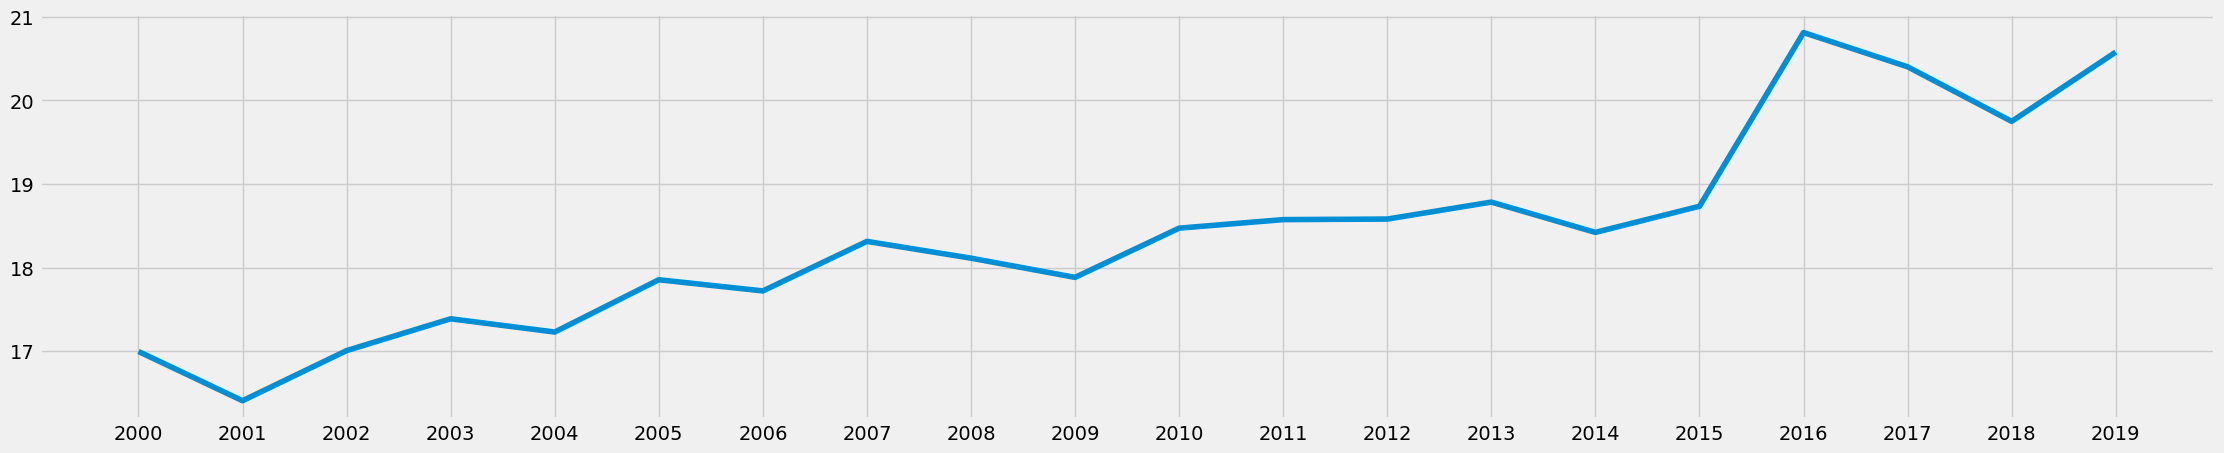

In [19]:
# Plot the new data set

plt.figure(figsize=(25,5), dpi=100)
plt.plot(data2)

In [20]:
# Decompose the time series using an additive model

#decomposition = sm.tsa.seasonal_decompose(df3, model='additive')
decomp = sm.tsa.seasonal_decompose(data2, freq=6)

In [21]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

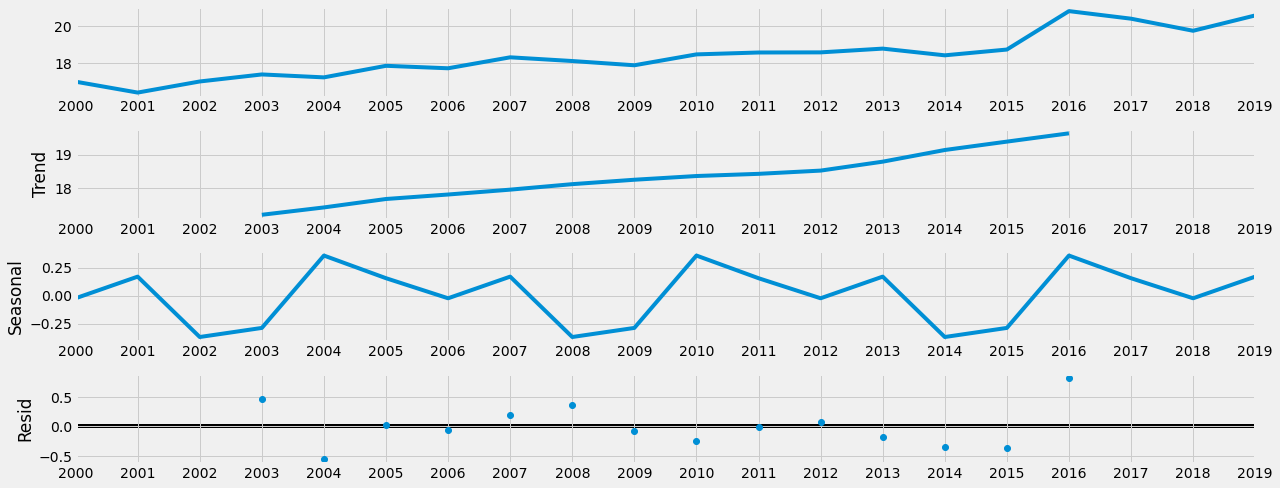

In [22]:
# Plot the separate components

decomp.plot()
plt.show()

### noise pretty small, consistent seasonal change, trend clearly visible

In [23]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data2['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                -0.045
p-value                        0.955
Number of Lags Used            8.000
Number of Observations Used   11.000
Critical Value (1%)           -4.223
Critical Value (5%)           -3.189
Critical Value (10%)          -2.730
dtype: float64


### Test statistic is NOT smaller than %critical value =  null hypothesis not rejected
### H0 null hypothesis = Emissions don't rise over the years

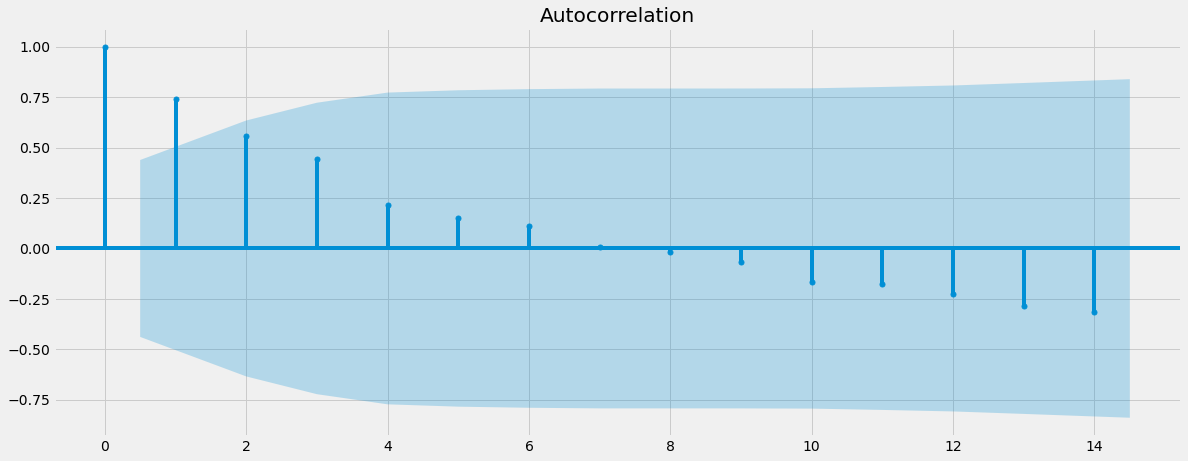

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data2)
plt.show()

In [25]:
data_diff = data2 - data2.shift(1)

In [26]:
data_diff.dropna(inplace=True)

In [27]:
data_diff.isnull().sum()

Value    0
dtype: int64

In [28]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_diff['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                -1.066
p-value                        0.728
Number of Lags Used            7.000
Number of Observations Used   11.000
Critical Value (1%)           -4.223
Critical Value (5%)           -3.189
Critical Value (10%)          -2.730
dtype: float64


In [29]:
data_diff2 = data_diff - data_diff.shift(1)

In [30]:
data_diff2.dropna(inplace=True)

In [31]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_diff2['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                 0.632
p-value                        0.988
Number of Lags Used            7.000
Number of Observations Used   10.000
Critical Value (1%)           -4.332
Critical Value (5%)           -3.233
Critical Value (10%)          -2.749
dtype: float64


# test statistic is still insignificant after two rounds of differencing. Other steps need to be taken

In [32]:
data_log = np.log(data_diff['Value'])

In [33]:
data_log.dropna(inplace=True)

In [34]:
data_log2 = data_log - data_log.shift(1)

In [35]:
data_log2.dropna(inplace=True)

In [36]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_log2)

Dickey-Fuller Stationarity test:
Test Statistic                -35.562
p-value                         0.000
Number of Lags Used             3.000
Number of Observations Used     6.000
Critical Value (1%)            -5.354
Critical Value (5%)            -3.646
Critical Value (10%)           -2.901
dtype: float64


# after taking the log of the first difference and another round of differencing we have a very small test statistic with which we can reject the null hypothesis
# null hypothesis: Emissions don't rise over the years